## Load Libraries & Dataset

In [2]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load Datasets
df=pd.read_csv("bank.csv",delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [5]:
# Rename y to Deposite for Futher use case
df.rename(columns={'y':'deposit'}, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [9]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


In [10]:
df.duplicated().sum()

0

## Exploratory Data Analysis

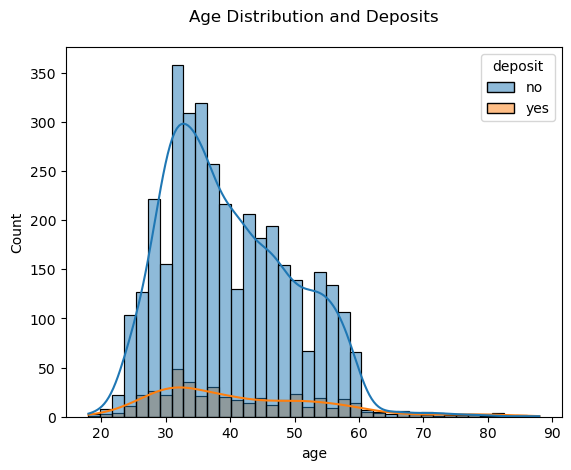

In [12]:
## Age Distribution
sns.histplot(x="age", data=df, kde=True, hue= "deposit")
plt.title("Age Distribution and Deposits\n")
plt.show()

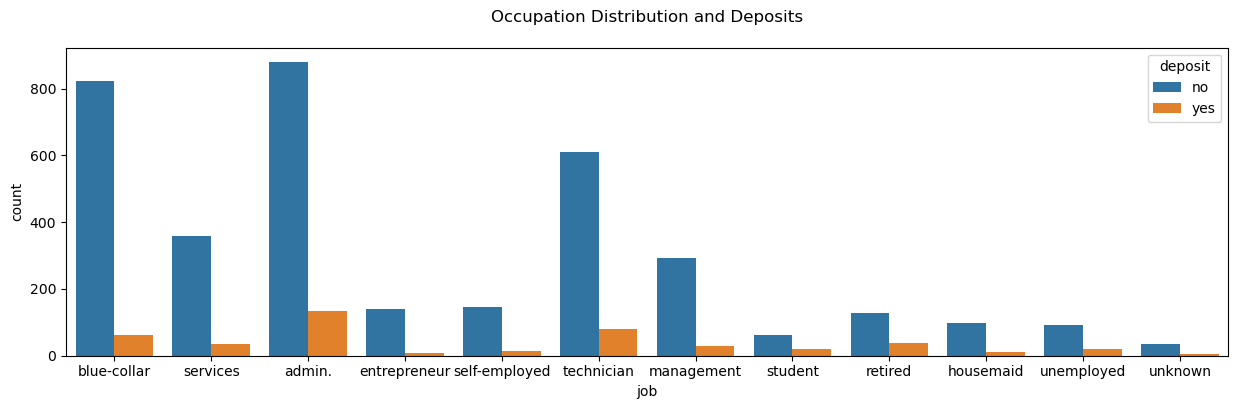

In [13]:
# Distribution of Occupation
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= df, hue ="deposit")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

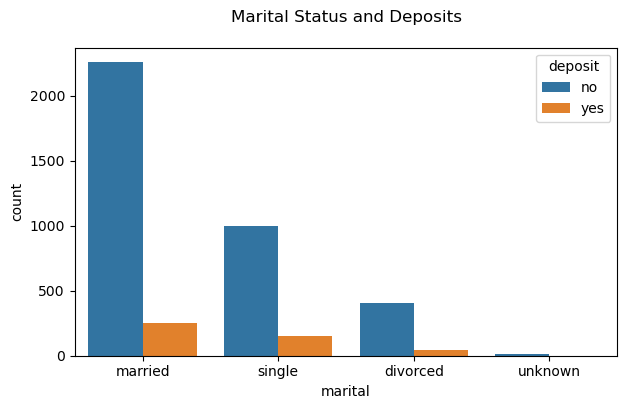

In [14]:
# Distribution by Marital Status
plt.figure(figsize=(7,4))
sns.countplot(x="marital", data= df, hue ="deposit")
plt.title("Marital Status and Deposits\n")
plt.show()

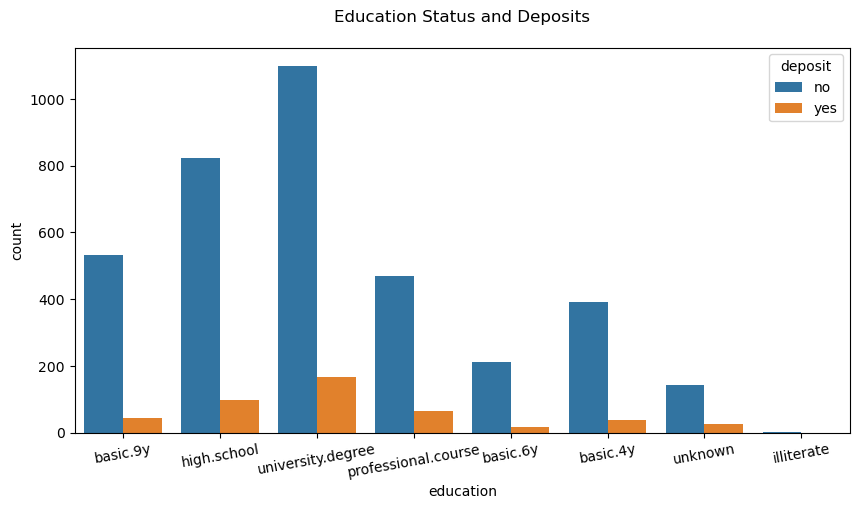

In [15]:
# Distribution of Education Status
plt.figure(figsize=(10,5))
sns.countplot(x="education", data= df, hue ="deposit")
plt.title("Education Status and Deposits\n")
plt.xticks(rotation=10)
plt.show()

In [16]:
df.default.value_counts()

default
no         3315
unknown     803
yes           1
Name: count, dtype: int64

##### Majority of clients do not have any Credit defaults. Only 1 client have a Credit default

#### Distribution of Credit Default

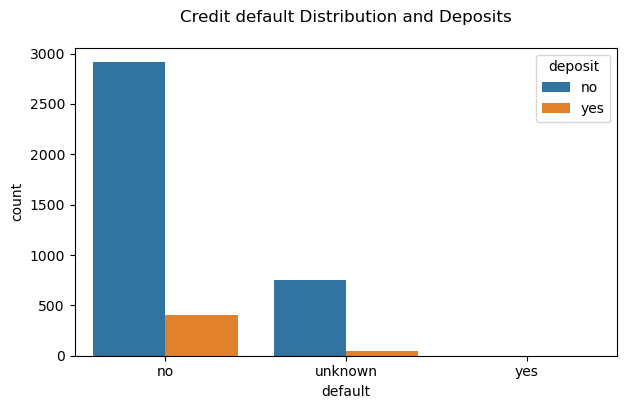

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(x="default", data= df, hue ="deposit")
plt.title("Credit default Distribution and Deposits\n")
plt.show()

#### Distribution of Housing Loan

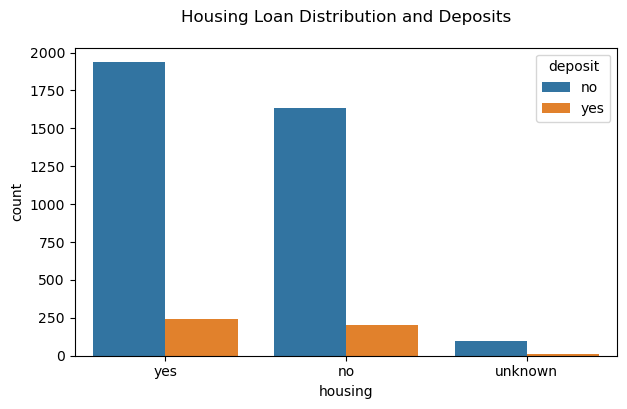

In [21]:
plt.figure(figsize=(7,4))
sns.countplot(x="housing", data= df, hue ="deposit")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

#### Distribution of Personal Loan

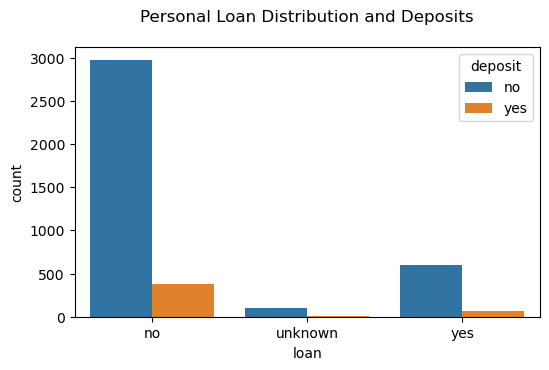

In [23]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= df, hue ="deposit")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

#### Distribution of Term Deposits

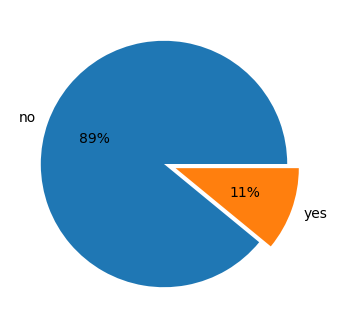

In [48]:
df.deposit.value_counts()
keys = df.deposit.value_counts().index
data = df.deposit.value_counts().values
plt.figure(figsize=(6,4))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

##### 11% of clients have subscribed to Term Deposit

## Prepare our data for Model building..

### Label Encoding for Categorical datas

In [75]:
cat = df.select_dtypes("object").columns
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[cat] = df[cat].apply(le.fit_transform)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


<Figure size 2300x1000 with 0 Axes>

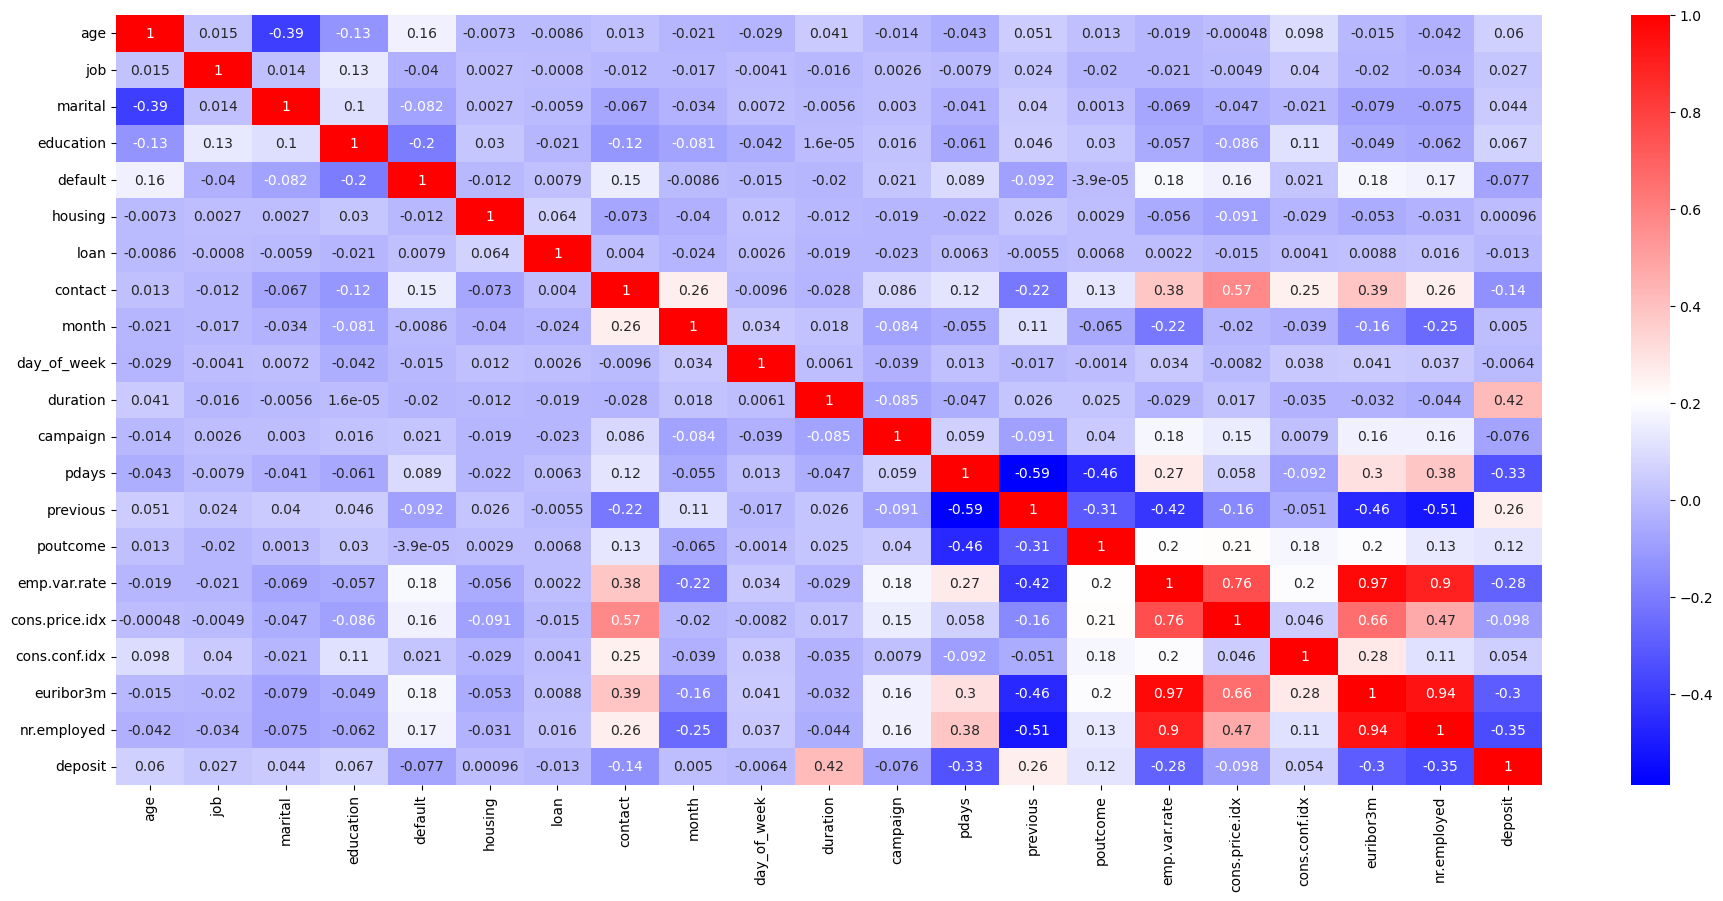

In [85]:
## Correlation Analysis using Heatmap
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(), cmap='bwr', annot=True)
plt.show()

### Splitting input and output

In [88]:
X = df.drop("deposit", axis=1)
y = df.deposit

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### Train-test split

In [99]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2)

In [103]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [105]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y))) 

Train Score: 1.0
Test Score: 0.8774271844660194


In [107]:
from sklearn.model_selection import cross_val_score

cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8928679817905918

In [184]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

eval_model(test_y, y_pred)

Accuracy_Score 0.8774271844660194
Confusion Matrix
 [[675  56]
 [ 45  48]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       731
           1       0.46      0.52      0.49        93

    accuracy                           0.88       824
   macro avg       0.70      0.72      0.71       824
weighted avg       0.88      0.88      0.88       824



In [186]:
mscore(dt)

Training Score 0.932928679817906
Testing Score 0.9016990291262136


## Visualizing the Tree

In [167]:
from sklearn.tree import plot_tree

cn = ['no','yes']
fn = train_X.columns
print(fn)
print(cn)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['no', 'yes']


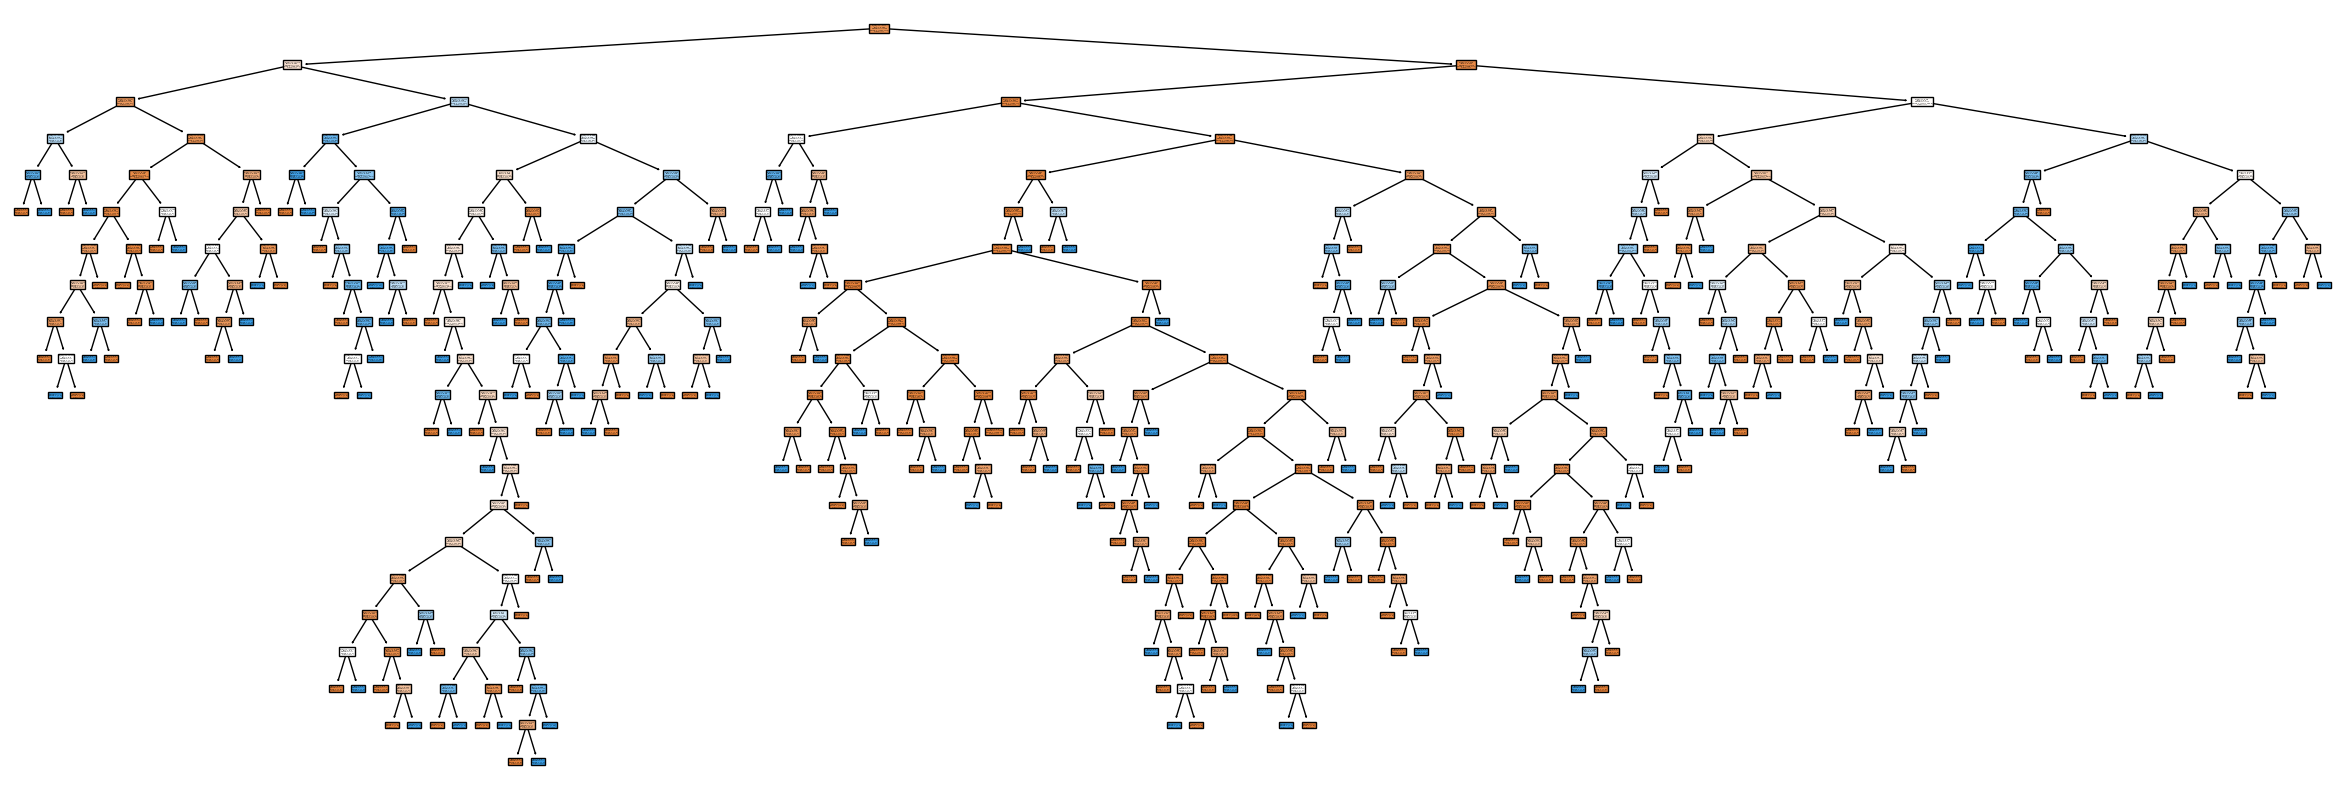

In [169]:
plt.figure(figsize=(30,10))
plot_tree(decision_tree,class_names=cn,filled=True)
plt.show()

###  DecisionTreeClassifier Usings "Gini" Methode

In [161]:
dt_G = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt_G.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [188]:
ypred_dt_G = dt_G.predict(test_X)
print(ypred_dt_G)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [190]:
eval_model(test_y,ypred_dt_G)

Accuracy_Score 0.9004854368932039
Confusion Matrix
 [[696  35]
 [ 47  46]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       731
           1       0.57      0.49      0.53        93

    accuracy                           0.90       824
   macro avg       0.75      0.72      0.74       824
weighted avg       0.90      0.90      0.90       824



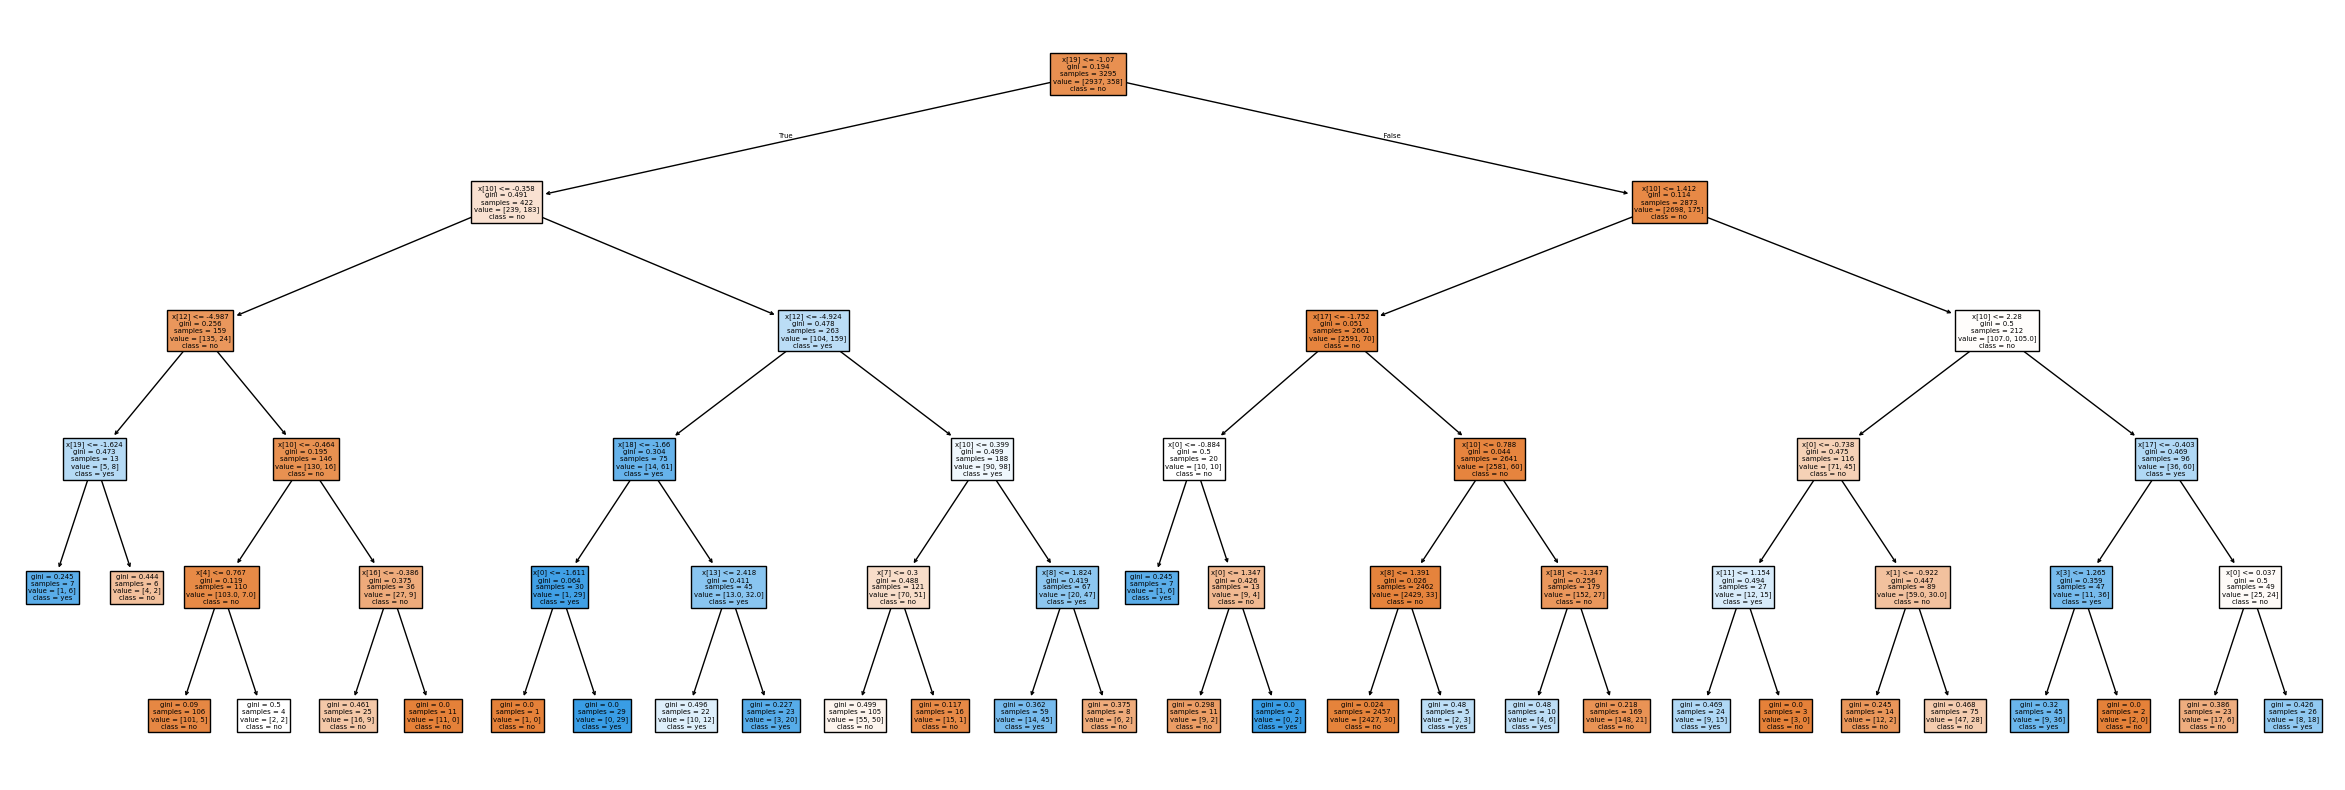

In [174]:
plt.figure(figsize=(30,10))
plot_tree(dt_G,class_names=cn,filled=True)
plt.show()

### DecisionTreeClassifier Using "entropy" Methode

In [180]:
dt_E = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt_E.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [192]:
ypred_dt_G = dt_E.predict(test_X)
print(ypred_dt_G)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 

In [196]:
eval_model(test_y,ypred_dt_G)

Accuracy_Score 0.9114077669902912
Confusion Matrix
 [[702  29]
 [ 44  49]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       731
           1       0.63      0.53      0.57        93

    accuracy                           0.91       824
   macro avg       0.78      0.74      0.76       824
weighted avg       0.91      0.91      0.91       824



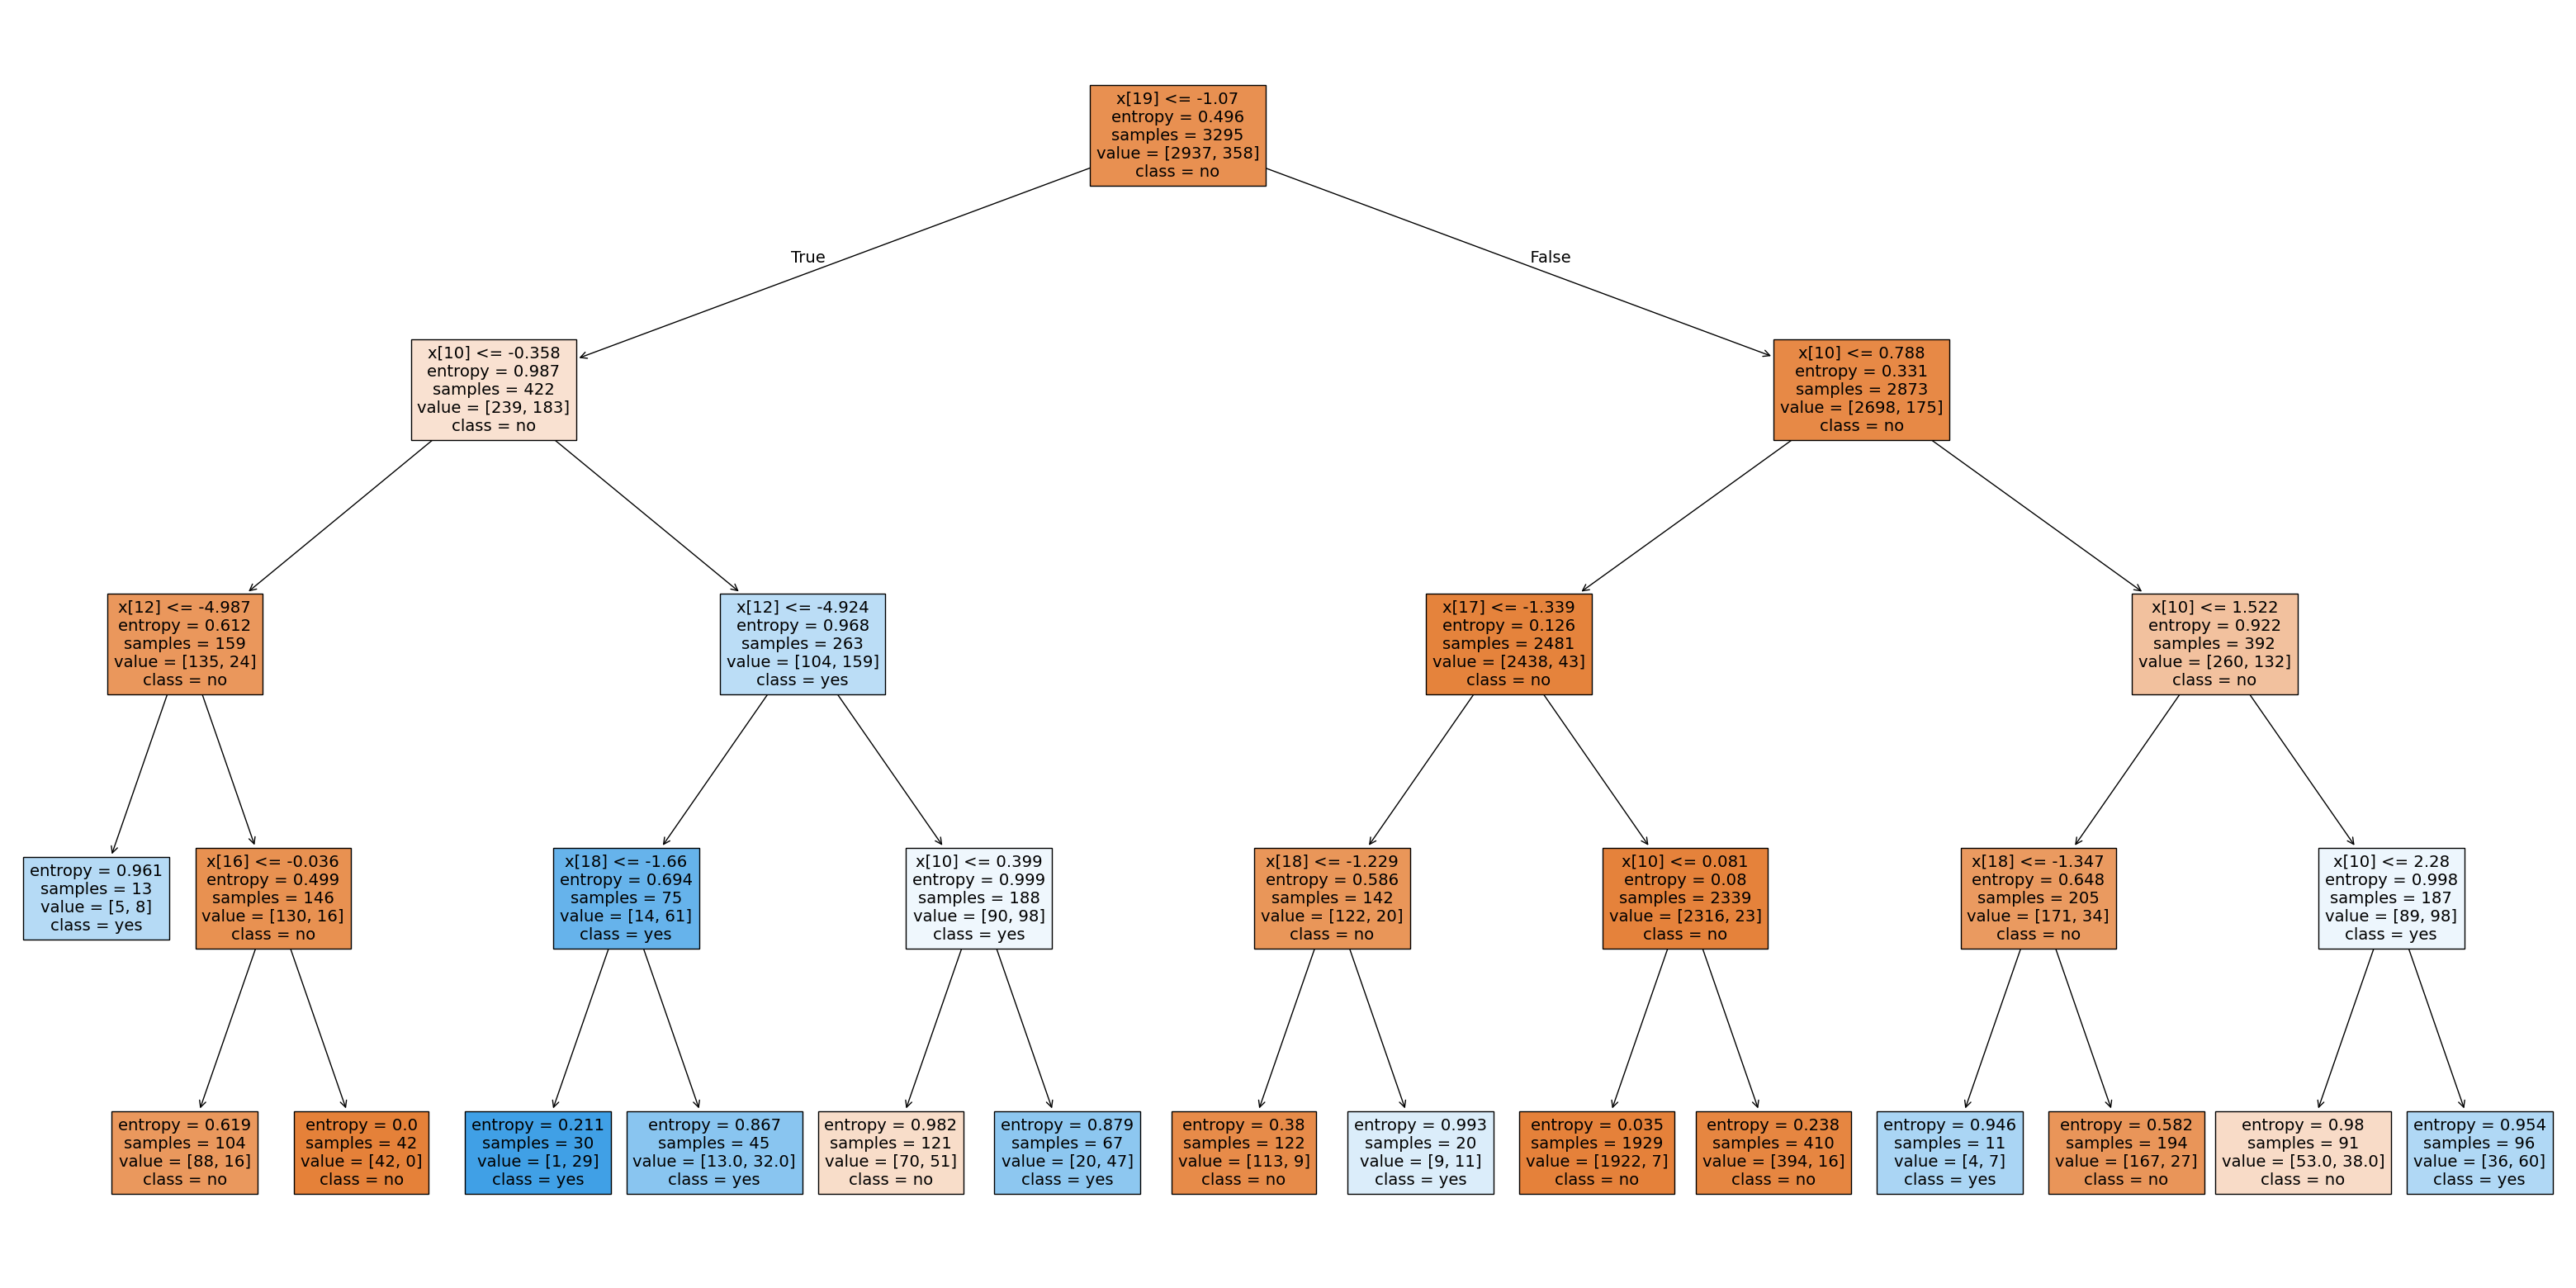

In [198]:
plt.figure(figsize=(40,20))
plot_tree(dt_E,class_names=cn,filled=True)
plt.show()